In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('house_data.csv')

In [ ]:
dataset.insert(4,"x0",1)
print (dataset.head())


           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 22 columns]


In [ ]:
x_data = dataset.iloc[:,[4,5,6,10,12,18]]
y_data = dataset['price']
print(x_data)

       x0  bathrooms  sqft_living  view  grade      lat
0       1       1.00         1180     0      7  47.5112
1       1       2.25         2570     0      7  47.7210
2       1       1.00          770     0      6  47.7379
3       1       3.00         1960     0      7  47.5208
4       1       2.00         1680     0      8  47.6168
...    ..        ...          ...   ...    ...      ...
21608   1       2.50         1530     0      8  47.6993
21609   1       2.50         2310     0      8  47.5107
21610   1       0.75         1020     0      7  47.5944
21611   1       2.50         1600     0      8  47.5345
21612   1       0.75         1020     0      7  47.5941

[21613 rows x 6 columns]


In [ ]:
#scaling
x1_max=x_data.iloc[:,1].max()
x2_max=x_data.iloc[:,2].max()
x3_max=x_data.iloc[:,3].max()
x4_max=x_data.iloc[:,4].max()
x5_max=x_data.iloc[:,5].max()
x_data.iloc[:,1]=(x_data.iloc[:,1])/(x1_max)
x_data.iloc[:,2]=(x_data.iloc[:,2])/(x2_max)
x_data.iloc[:,3]=(x_data.iloc[:,3])/(x3_max)
x_data.iloc[:,4]=(x_data.iloc[:,4])/(x4_max)
x_data.iloc[:,5]=(x_data.iloc[:,5])/(x5_max)
print(x_data)

       x0  bathrooms  sqft_living  view     grade       lat
0       1    0.12500     0.087149   0.0  0.538462  0.994424
1       1    0.28125     0.189808   0.0  0.538462  0.998815
2       1    0.12500     0.056869   0.0  0.461538  0.999169
3       1    0.37500     0.144756   0.0  0.538462  0.994625
4       1    0.25000     0.124077   0.0  0.615385  0.996634
...    ..        ...          ...   ...       ...       ...
21608   1    0.31250     0.112999   0.0  0.615385  0.998361
21609   1    0.31250     0.170606   0.0  0.615385  0.994414
21610   1    0.09375     0.075332   0.0  0.538462  0.996166
21611   1    0.31250     0.118168   0.0  0.615385  0.994912
21612   1    0.09375     0.075332   0.0  0.538462  0.996159

[21613 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#convert to matrix
x_data=np.array(x_data)
y_data=np.array(y_data).flatten()
print(x_data.shape)
print(y_data.shape)

(21613, 6)
(21613,)


In [ ]:
#split data train & test 80/20
trainSize=int(y_data.size*.8)
print(trainSize)
xTrain=x_data[:trainSize]
xTest=x_data[trainSize:]

yTrain=y_data[:trainSize]
yTest=y_data[trainSize:]

print(xTrain,xTest)
print(len(yTrain),len(yTest))

17290
[[1.         0.125      0.08714919 0.         0.53846154 0.99442417]
 [1.         0.28125    0.18980798 0.         0.53846154 0.99881534]
 [1.         0.125      0.05686854 0.         0.46153846 0.99916907]
 ...
 [1.         0.25       0.18759232 0.75       0.61538462 0.99622417]
 [1.         0.53125    0.38035451 0.5        0.84615385 0.99688557]
 [1.         0.5625     0.25258493 0.         0.69230769 0.99811418]] [[1.         0.3125     0.1676514  0.         0.61538462 0.99856209]
 [1.         0.3125     0.1676514  0.         0.61538462 0.99856209]
 [1.         0.3125     0.10856721 0.         0.61538462 0.99517766]
 ...
 [1.         0.09375    0.07533235 0.         0.53846154 0.99616557]
 [1.         0.3125     0.11816839 0.         0.61538462 0.99491184]
 [1.         0.09375    0.07533235 0.         0.53846154 0.99615929]]
17290 4323


In [ ]:
alpha=.8
ceta=np.array([0,0,0,0,0,0])
mse=[]
def gradientDescentOneVar():
    global ceta,mse
    for i in range(10000):
        y_pred = xTrain.dot(ceta) 
        ceta = ceta - ((xTrain.T.dot(y_pred - yTrain)) * alpha * (1 / trainSize))
        ceta0,ceta1,ceta2,ceta3,ceta4,ceta5=ceta
        mse.append(MSE(ceta0,ceta1,ceta2,ceta3,ceta4,ceta5))
    print("MSE = ",MSE(ceta0,ceta1,ceta2,ceta3,ceta4,ceta5))
    print("Theta: ",ceta)

In [ ]:
def MSE(ceta0,ceta1,ceta2,ceta3,ceta4,ceta5):
    Esum=0
    xTrain1=xTrain[:,1]
    xTrain2=xTrain[:,2]
    xTrain3=xTrain[:,3]
    xTrain4=xTrain[:,4]
    xTrain5=xTrain[:,5]
    for i in range(trainSize):
        Esum+=pow( yTrain[i] - (ceta0 + (ceta1*xTrain1[i]) + (ceta2*xTrain2[i]) + (ceta3*xTrain3[i]) + (ceta4*xTrain4[i]) + (ceta5*xTrain5[i]) ) , 2)
    Esum=Esum*(1/(2 * trainSize))
    return Esum

In [ ]:
gradientDescentOneVar()

MSE =  28580628003.468876
Theta:  [-1301428.97054876  -259002.54816933  2552239.07853718   381625.47559621
  1194494.59979431   797049.47995597]


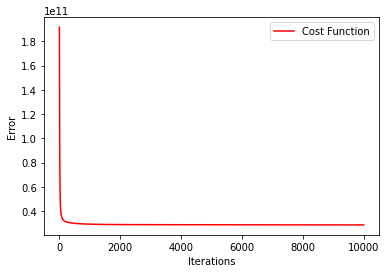

In [ ]:
plt.plot(mse, label='Cost Function',c='red') 
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
def predTest():
    ytestpred = xTest.dot(ceta)
    print('Predicted price:',ytestpred)
    print('Orignal price:',yTest)

In [ ]:
predTest()

Predicted price: [576496.18865046 576496.18865046 423001.63817788 ... 303738.35164539
 447294.28160993 303733.34689747]
Orignal price: [380000. 624900. 379770. ... 402101. 400000. 325000.]


In [ ]:
#Trying different alphas
#alpha = .8       iteration = 100000      MSE =  26803945799.290802
#alpha = .4       iteration = 100000      MSE =  27656845318.353786
#alpha = .1       iteration = 100000      MSE =  28515275366.74755
#alpha = .01      iteration = 10000       MSE =  32704127208.611366
#alpha = .001     iteration = 50000       MSE =  36509641064.27643
#alpha = .0001    iteration = 100000      MSE =  50854593503.595795